# TechHorizon Internship - Task 2
### Image Classification Using Pre-trained MobileNetV2
This notebook demonstrates how to classify general images using a pre-trained MobileNetV2 model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import os


In [2]:
# Load MobileNetV2 with ImageNet weights
model = MobileNetV2(weights='imagenet')


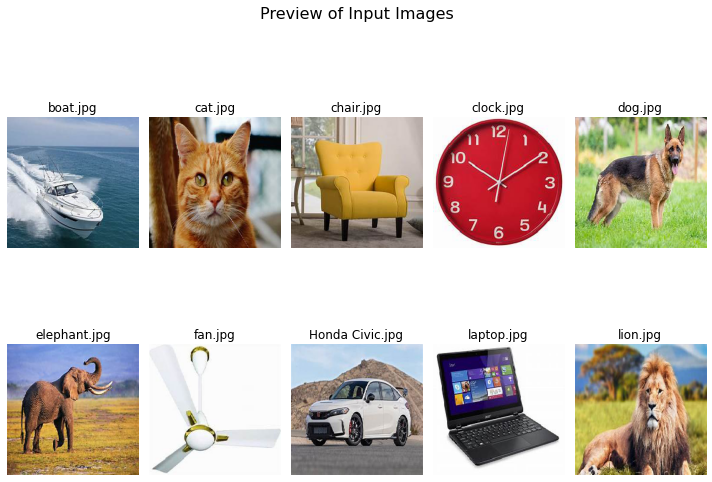

In [3]:
# Preview all images in 'Test_Images_MobileNetV2/' folder before classification

image_dir = "Test_Images_MobileNetV2"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

plt.figure(figsize=(10, 8))
for idx, fname in enumerate(image_files[:10]):
    img_path = os.path.join(image_dir, fname)
    img = image.load_img(img_path, target_size=(224, 224))
    
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')

plt.suptitle("Preview of Input Images", fontsize=16)
plt.tight_layout()
plt.show()


In [4]:
# Function to load and preprocess an image
def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)


In [5]:
# Function to predict top 3 classes
def predict_image(img_path):
    processed_img = load_and_preprocess(img_path)
    preds = model.predict(processed_img)
    decoded = decode_predictions(preds, top=3)[0]
    return decoded


1/1 [==============================] - 0s 52ms/step


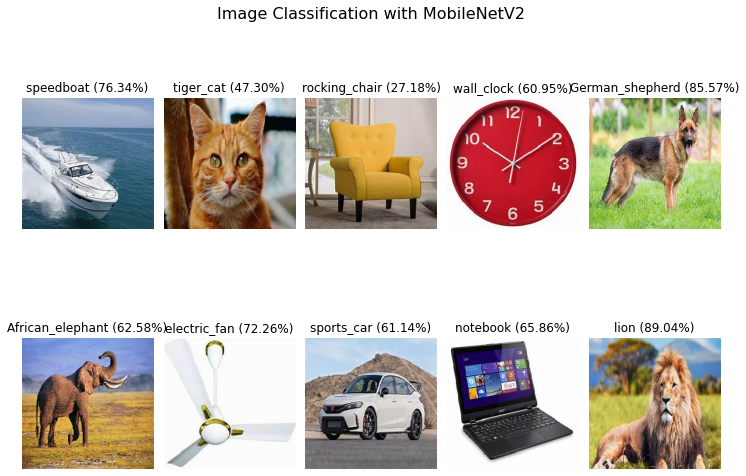

In [6]:
# Put your images in a folder named 'Test_Images_MobileNetV2' in the same directory as this notebook
image_dir = "Test_Images_MobileNetV2"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

plt.figure(figsize=(10, 8))
for idx, fname in enumerate(image_files[:10]):
    img_path = os.path.join(image_dir, fname)
    preds = predict_image(img_path)

    # Show image with top prediction
    plt.subplot(2, 5, idx + 1)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{preds[0][1]} ({preds[0][2]*100:.2f}%)")

plt.tight_layout()
plt.suptitle("Image Classification with MobileNetV2", fontsize=16)
plt.show()


Note: Make sure you create a folder named `Test_Images_MobileNetV2` and add your `.jpg` or `.png` images there before running the notebook. -->